In [274]:
import pandas as pd
import os
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [275]:
df = pd.read_csv('metadata/UrbanSound8K.csv')

In [276]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [277]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]

fold1 = 'audio/fold1'
list1 = os.listdir(fold1)

fold2 = 'audio/fold2'
list2 = os.listdir(fold2)

fold3 = 'audio/fold3'
list3 = os.listdir(fold3)

fold4 = 'audio/fold4'
list4 = os.listdir(fold4)

fold5 = 'audio/fold5'
list5 = os.listdir(fold5)

fold6 = 'audio/fold6'
list6 = os.listdir(fold6)

fold7 = 'audio/fold7'
list7 = os.listdir(fold7)

fold8 = 'audio/fold8'
list8 = os.listdir(fold8)

fold9 = 'audio/fold9'
list9 = os.listdir(fold9)

fold10 = 'audio/fold10'
list10 = os.listdir(fold10)

lista = list1 + list2 + list3 + list4 + list5 + list6 + list7 + list8 + list9 + list10

In [278]:
#ha excecoes: audio/fold[]/.DS_store

def path_class(filename):
    excerpt = df[df['slice_file_name'] == filename]
    
    if not excerpt.empty:
        path_name = os.path.join('audio', 'fold'+str(excerpt.fold.values[0]), filename)
        return path_name
    
    else:
        return None

In [279]:
path_list=[]
for i in lista:
    p = path_class(i)
    if (p!=None):
        path_list.append(p)

In [397]:
# Normalização min-max
def normalize(y):
    min_val = np.min(y)
    max_val = np.max(y)
    ynormalized = (y - min_val) / (max_val - min_val)
    return ynormalized

############################################################################################################################
    #Ver com qual normalizacao da melhor accuracy
        
    #Normalizacao z-score -> nao sei se funciona imprimiu uma wave de 5-10 no y-axis
    #media = np.mean(y_extended)
    #desvio_padrao = np.std(y_extended)
    #ynormalized2 = (y_extended - media) / desvio_padrao
        
    #Normalizacao por amplitude maxima
    #max_amplitude = np.max(np.abs(y_extended))
    #ynormalized3 = y_extended / max_amplitude
        
    #Nao se pode usar
    #Normalizacao logaritmica 
    #ynormalized4 = np.log(1 + y_extended)
        
    #Normalizacao Tangente Hiperbólica
    #ynormalized5 = np.tanh(y_extended)
        
    #Normalizacao L1
    #ynormalized6 = y_extended / np.sum(np.abs(y_extended))
        
    #Normalizacao L2
    #ynormalized7 = y_extended / np.sqrt(np.sum(y_extended**2))
############################################################################################################################

# Com MFCCs

In [332]:
sr = 44100
n_mfcc = 40
hop_length=round(sr*0.0125)
window_length=round(sr*0.023)
n_fft=2**14
mfcc_time_size = 4*sr//hop_length+1

In [333]:
#dataset=np.zeros(shape=[len(path_list),4*sr])
#dataset_mfcc=np.zeros(shape=[len(path_list),n_mfcc,mfcc_time_size])

In [334]:
resample_sr = 44100 #sample rate padrao
desired = 4.0 #tempo do audio padrao
i=0
for f in path_list:
    f = f'{f}'
    y, previous_sr = librosa.load(f, sr=None)
    y_resample =librosa.resample(y, orig_sr=previous_sr, target_sr=sr)
    
    if len(y_resample)<4*sr:
        # Calculate the number of times to repeat the audio
        repeat = int(np.ceil(desired * sr / len(y_resample)))

        # Repeat the audio
        y_extended = np.tile(y_resample, repeat)

        # Trim the array to the desired duration
        y_extended = y_extended[:int(desired * sr)]

    else:
        y_extended = y_resample
        
    ynormalized = normalize(y_extended)
    ynormalized = ynormalized[:4*sr]
    #dataset[i] = ynormalized
    
# MFCCs

    mfcc = librosa.feature.mfcc(y=ynormalized,sr=sr,n_fft=n_fft,hop_length=hop_length,win_length=window_length,n_mfcc=n_mfcc)
    y_mfcc = normalize(mfcc)
    #dataset_mfcc[i] = y_mfcc
    i+=1

In [335]:
ynormalized

array([0.48927456, 0.48912716, 0.4892435 , ..., 0.5331539 , 0.53430206,
       0.53301424], dtype=float32)

In [336]:
ynormalized.shape

(176400,)

In [337]:
y_mfcc

array([[0.6368025 , 0.06374277, 0.22867814, ..., 0.32991022, 0.271212  ,
        0.6404793 ],
       [0.8941744 , 0.883724  , 0.99697304, ..., 0.9271172 , 0.9302937 ,
        0.88932294],
       [0.696893  , 0.71162945, 0.6461189 , ..., 0.54218084, 0.5769551 ,
        0.6889062 ],
       ...,
       [0.66226166, 0.66432637, 0.6669449 , ..., 0.66641265, 0.6889281 ,
        0.66398525],
       [0.66215277, 0.685578  , 0.67190814, ..., 0.65431523, 0.66997397,
        0.66172993],
       [0.661812  , 0.6680621 , 0.6694439 , ..., 0.66833466, 0.6596931 ,
        0.66016704]], dtype=float32)

In [338]:
y_mfcc.shape

(40, 321)

# Com MFCC DELTA

In [341]:
mfcc_delta = librosa.feature.delta(y_mfcc)
y_mfcc_delta = normalize(mfcc_delta)

In [342]:
y_mfcc_delta

array([[0.6079492 , 0.6079492 , 0.6079492 , ..., 0.26439953, 0.26439953,
        0.26439953],
       [0.41964585, 0.41964585, 0.41964585, ..., 0.34575787, 0.34575787,
        0.34575787],
       [0.13922785, 0.13922785, 0.13922785, ..., 0.54599094, 0.54599094,
        0.54599094],
       ...,
       [0.400612  , 0.400612  , 0.400612  , ..., 0.37171555, 0.37171555,
        0.37171555],
       [0.38548985, 0.38548985, 0.38548985, ..., 0.35904032, 0.35904032,
        0.35904032],
       [0.39278582, 0.39278582, 0.39278582, ..., 0.36744833, 0.36744833,
        0.36744833]], dtype=float32)

In [343]:
y_mfcc_delta.shape

(40, 321)

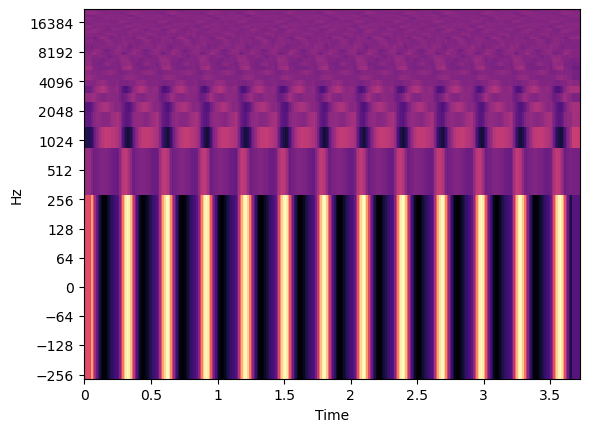

In [395]:
#Observar y_mfcc_delta
librosa.display.specshow(y_mfcc_delta, sr=sr, x_axis='time', y_axis='log')

In [346]:
mfcc_delta2 = librosa.feature.delta(y_mfcc, order=2)
y_mfcc_delta2 = normalize(mfcc_delta2)

In [347]:
y_mfcc_delta2

array([[0.74310833, 0.74310833, 0.74310833, ..., 0.7834328 , 0.7834328 ,
        0.7834328 ],
       [0.3007416 , 0.3007416 , 0.3007416 , ..., 0.41872582, 0.41872582,
        0.41872582],
       [0.5596612 , 0.5596612 , 0.5596612 , ..., 0.6045127 , 0.6045127 ,
        0.6045127 ],
       ...,
       [0.45389247, 0.45389247, 0.45389247, ..., 0.42092228, 0.42092228,
        0.42092228],
       [0.47100243, 0.47100243, 0.47100243, ..., 0.4620138 , 0.4620138 ,
        0.4620138 ],
       [0.4169391 , 0.4169391 , 0.4169391 , ..., 0.4620429 , 0.4620429 ,
        0.4620429 ]], dtype=float32)

In [348]:
y_mfcc_delta2.shape

(40, 321)

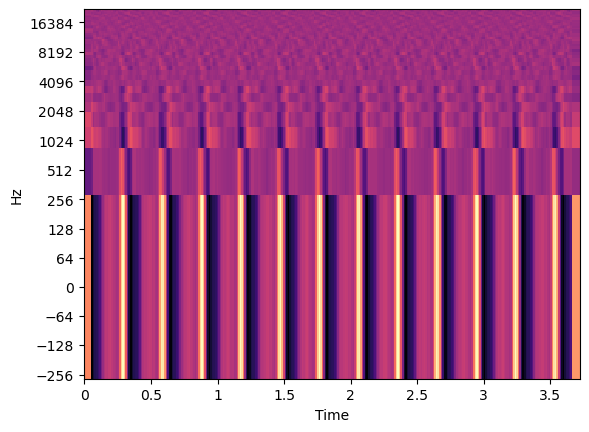

In [396]:
#Observar y_mfcc_delta2
librosa.display.specshow(y_mfcc_delta2, sr=sr, x_axis='time', y_axis='log')

# Com SPECTROGRAM

In [350]:
#dataset_spectrogram = np.empty((len(path_list), 8193, 321), dtype=np.float32)

In [356]:
#Spectogram

stft = librosa.core.stft(ynormalized, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)
y_spectrogram = normalize(spectrogram)
#dataset_spectrogram[i] = y_spectrogram

In [357]:
y_spectrogram

array([[5.0005603e-01, 5.6706589e-01, 6.3258964e-01, ..., 6.4179969e-01,
        5.7660878e-01, 5.0972199e-01],
       [4.0478066e-01, 4.4395325e-01, 4.7754478e-01, ..., 4.8185381e-01,
        4.4915611e-01, 4.1070932e-01],
       [2.1220124e-01, 2.0866399e-01, 1.9834033e-01, ..., 1.9635074e-01,
        2.0759441e-01, 2.1213482e-01],
       ...,
       [6.2018742e-05, 6.1527222e-05, 5.9700422e-05, ..., 6.1177561e-05,
        6.3753840e-05, 6.4900465e-05],
       [6.1772320e-05, 6.1155370e-05, 5.9202088e-05, ..., 6.3113686e-05,
        6.5401109e-05, 6.6284454e-05],
       [6.0934959e-05, 6.0076753e-05, 5.7873429e-05, ..., 6.4112457e-05,
        6.6372137e-05, 6.7161884e-05]], dtype=float32)

In [358]:
y_spectrogram.shape

(8193, 321)

# Observar SPECTROGRAM

In [359]:
Y_scale = y_spectrogram**2
Y_scale.shape

(8193, 321)

In [360]:
def plot_spectrogram(y_normalized,sr,hop_length,y_axis='linear'):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(y_normalized,sr=sr,hop_length=hop_length,x_axis='time',y_axis=y_axis)
    plt.colorbar()

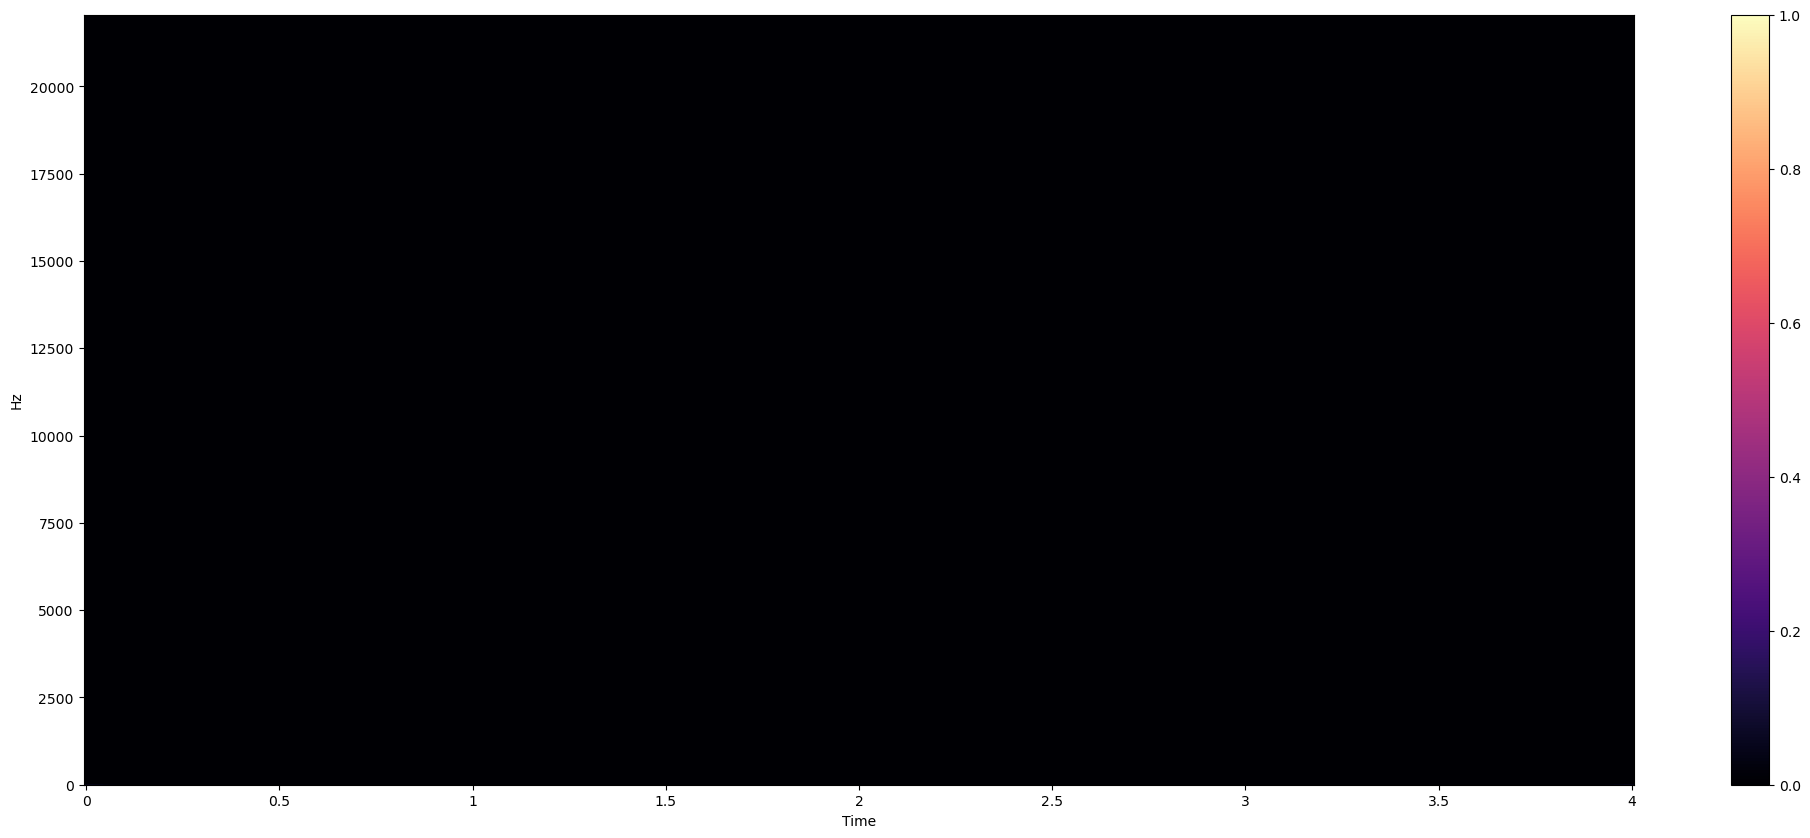

In [361]:
plot_spectrogram(Y_scale,sr,hop_length)

# Com LOG-SPECTROGRAM

In [362]:
#dataset_logspectrogram = np.empty((len(path_list), 8193, 321), dtype=np.float32)

In [364]:
#Log-Spectogram

logspectrogram = librosa.amplitude_to_db(y_spectrogram)
y_logspectrogram = normalize(logspectrogram)
#dataset_logspectrogram[i] = y_logspectrogram

In [365]:
y_logspectrogram

array([[0.92475474, 0.9384084 , 0.9502805 , ..., 0.9518498 , 0.94022036,
        0.92683333],
       [0.9018049 , 0.91183436, 0.91975355, ..., 0.92072886, 0.9130993 ,
        0.9033836 ],
       [0.831687  , 0.8298618 , 0.82435274, ..., 0.8232581 , 0.8293039 ,
        0.831653  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [366]:
y_logspectrogram.shape

(8193, 321)

# Observar LOG-SPECTROGRAM

In [367]:
Y_logscale = librosa.power_to_db(Y_scale)

In [368]:
Y_logscale.shape

(8193, 321)

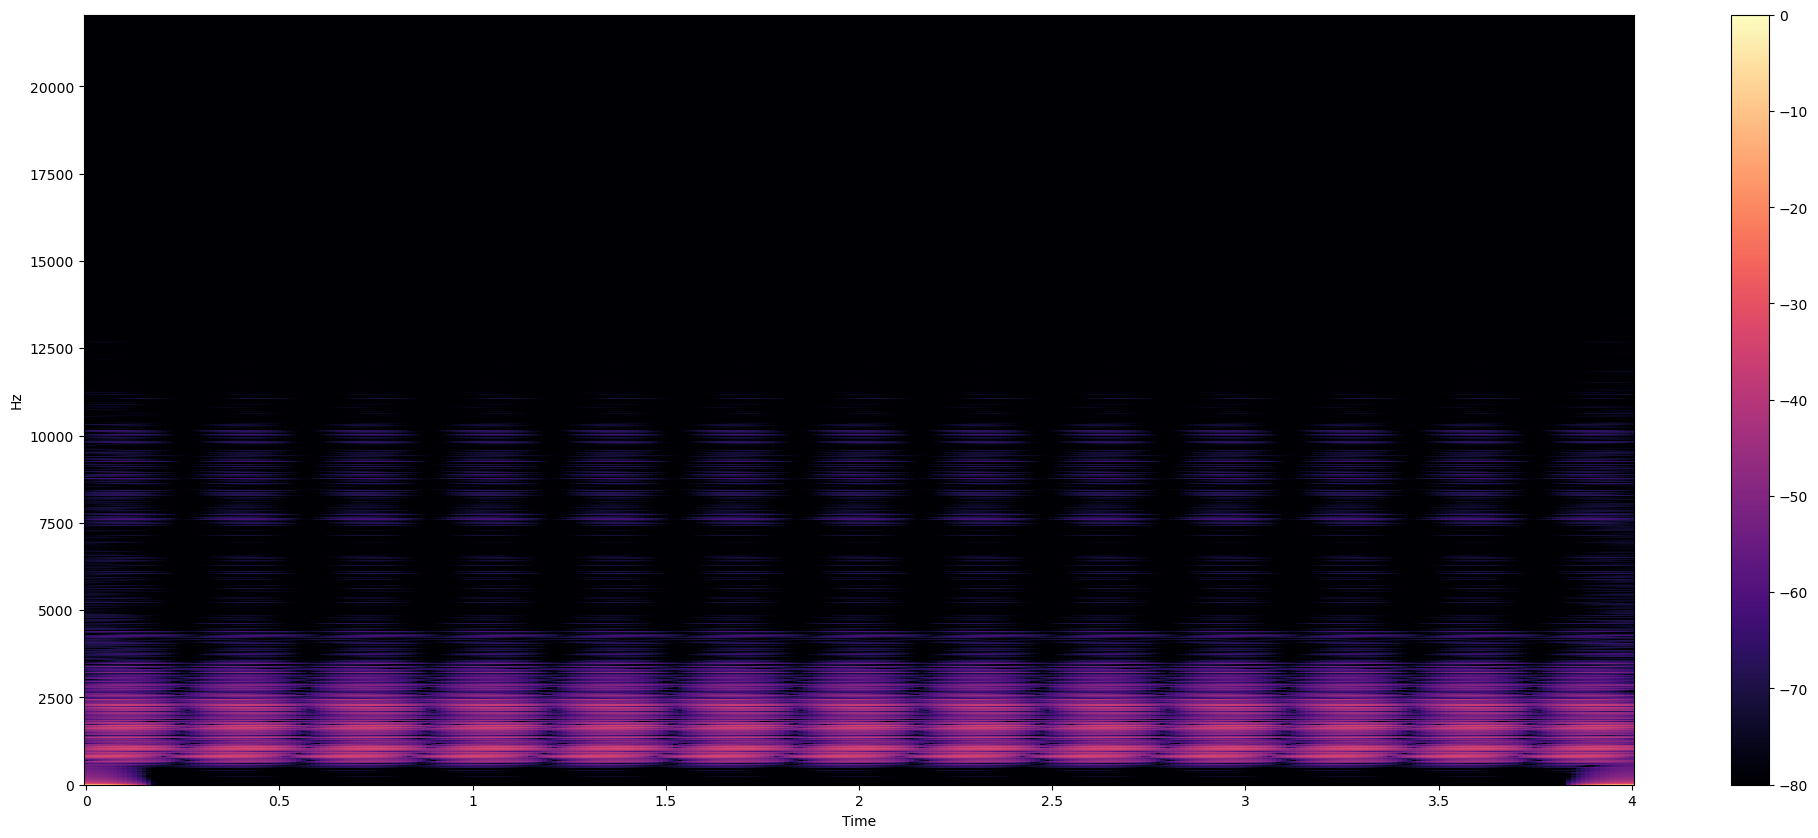

In [369]:
plot_spectrogram(Y_logscale,sr,hop_length)

# Com MELSPECTROGRAM

In [370]:
melstft = librosa.feature.melspectrogram(S=y_spectrogram, sr=sr)
y_melstft = normalize(melstft)

In [371]:
y_melstft

array([[0.9989971 , 0.9962658 , 0.9721375 , ..., 0.9670343 , 0.9941772 ,
        1.        ],
       [0.37283358, 0.3686804 , 0.35641813, ..., 0.35395935, 0.36734965,
        0.37269056],
       [0.24117465, 0.23848651, 0.23055223, ..., 0.22905996, 0.23772134,
        0.24117151],
       ...,
       [0.00153234, 0.00151673, 0.00146728, ..., 0.00158845, 0.00164781,
        0.00167055],
       [0.00152226, 0.00150614, 0.00145621, ..., 0.00157339, 0.00163301,
        0.00165614],
       [0.0015157 , 0.00149902, 0.00144848, ..., 0.0015701 , 0.0016305 ,
        0.00165428]], dtype=float32)

In [372]:
y_melstft.shape

(128, 321)

# Com MELSPECTROGRAM DB

In [373]:
melstft_db = librosa.power_to_db(y_melstft, ref=np.max)
y_melstft_db = normalize(melstft_db)

In [374]:
y_melstft_db

array([[0.9999455 , 0.99979687, 0.9984659 , ..., 0.9981802 , 0.999683  ,
        1.        ],
       [0.9464394 , 0.9458313 , 0.943995  , ..., 0.94361913, 0.94563496,
        0.9464186 ],
       [0.9227915 , 0.9221829 , 0.92034614, ..., 0.9199937 , 0.9220085 ,
        0.9227907 ],
       ...,
       [0.6481695 , 0.6476135 , 0.64581394, ..., 0.6501218 , 0.65211356,
        0.6528573 ],
       [0.64781123, 0.647233  , 0.64540315, ..., 0.6496047 , 0.6516235 ,
        0.6523871 ],
       [0.6475767 , 0.64697593, 0.6451142 , ..., 0.64949083, 0.6515401 ,
        0.6523262 ]], dtype=float32)

In [375]:
y_melstft_db.shape

(128, 321)

# Com CHROMA SPECTROGRAM

In [378]:
chroma = librosa.feature.chroma_stft(y=ynormalized, S=y_spectrogram, sr=sr)
y_chroma = normalize(chroma)

In [379]:
y_chroma

array([[0.39376292, 0.40729392, 0.42210737, ..., 0.7205448 , 0.7600899 ,
        0.79778427],
       [0.40860674, 0.43455845, 0.4615817 , ..., 0.8945818 , 0.9479759 ,
        1.        ],
       [0.3108405 , 0.3136205 , 0.3180708 , ..., 0.5212762 , 0.55862695,
        0.5985374 ],
       ...,
       [0.5214477 , 0.5264929 , 0.5325647 , ..., 0.66920507, 0.69356984,
        0.71794564],
       [0.30078214, 0.29518312, 0.29118225, ..., 0.41235897, 0.44648156,
        0.48240587],
       [0.2820168 , 0.27730557, 0.27456582, ..., 0.42199445, 0.45686677,
        0.49268195]], dtype=float32)

In [381]:
y_chroma.shape

(12, 321)

# Resultado de vários tipos de normalização

In [382]:
#Mostrar normalizacoes
#index=0
#plt.figure()
#plt.plot(np.asarray(list(range(4*sr)))/sr,dataset[index]) #INPUT DO RNN
#plt.imshow(dataset_mfcc[index])
#plt.show()

# Imagens -> DataFrame -> csv

Testei com 1 exemplo só

In [390]:
newdata = pd.DataFrame()
i=0
for f in path_list:
    #print(f)
    f = f'{f}'
    path_parts = f.split('/')
    arquivo = path_parts[-1]
    
    if arquivo in df['slice_file_name'].values:
        fold = df[df['slice_file_name'] == arquivo].iloc[0]['fold']
        classe = df[df['slice_file_name'] == arquivo].iloc[0]['class']
        fsID = df[df['slice_file_name'] == arquivo].iloc[0]['fsID']
        salience = df[df['slice_file_name'] == arquivo].iloc[0]['salience']
        classID = df[df['slice_file_name'] == arquivo].iloc[0]['classID']
        

        newdata.at[i, 'file'] = arquivo
        newdata.at[i, 'fsID'] = fsID
        newdata.at[i, 'salience'] = salience
        newdata.at[i, 'fold'] = fold
        newdata.at[i, 'classID'] = classID
        newdata.at[i, 'class'] = classe
        
    i+=1
    
newdata['images_rnn'] = [np.zeros(4*sr) for _ in range(len(path_list))]
newdata['images_mfcc'] = [np.zeros((n_mfcc, mfcc_time_size)) for _ in range(len(path_list))]
newdata['images_spectrogram'] = [np.empty((8193, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['images_log'] = [np.empty((8193, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['images_mel'] = [np.empty((128, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['images_mel_db'] = [np.empty((128, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['images_mel_delta'] = [np.empty((40, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['images_mel_delta2'] = [np.empty((40, 321), dtype=np.float32) for _ in range(len(path_list))]
newdata['images_chroma'] = [np.empty((12, 321), dtype=np.float32) for _ in range(len(path_list))]

columns = ['file', 'fsID', 'salience', 'fold', 'images_rnn', 'images_mfcc', 'images_spectrogram', 'images_log', 'images_mel', 'images_mel_db', 'images_chroma', 'images_mel_delta', 'images_mel_delta2', 'classID', 'class']

newdata = newdata[columns]

In [391]:
i=0

# np.column_stack é usado para combinar os valores do eixo x (np.asarray(list(range(4 * sr))) / sr) 
# com os valores do eixo y (dataset[index]) em uma única matriz (ver plot)
newdata.at[i, 'images_rnn'] = np.column_stack((np.asarray(list(range(4 * sr))) / sr, ynormalized))
    
# MFCCs
newdata.at[i, 'images_mfcc'] = y_mfcc
    
#Spectrogram
newdata.at[i, 'images_spectrogram'] = y_spectrogram
    
#Log spectrogram
newdata.at[i, 'images_log'] = y_logspectrogram

#Mel spectrogram
newdata.at[i, 'images_mel'] = y_melstft

#Mel spectrogram DB
newdata.at[i, 'images_mel_db'] = y_melstft_db

#Chroma spectrogram
newdata.at[i, 'images_chroma'] = y_chroma

newdata.at[i, 'images_mel_delta'] = y_mfcc_delta

newdata.at[i, 'images_mel_delta2'] = y_mfcc_delta2

i+=1

In [392]:
#float_format='%.0f' -> aparecia fold: 7.0 em vez de 7

newdata.to_csv('features.csv', float_format='%.0f', index=False)

In [393]:
df2 = pd.read_csv('features.csv')

In [394]:
df2

,file,fsID,salience,fold,images_rnn,images_mfcc,images_spectrogram,images_log,images_mel,images_mel_db,images_chroma,images_mel_delta,images_mel_delta2,classID,class
0,100032-3-0-0.wav,100032,1,5,[[0.00000000e+00 4.89274561e-01]\n [2.26757370...,[[0.6368025 0.06374277 0.22867814 ... 0.32991...,[[5.0005603e-01 5.6706589e-01 6.3258964e-01 .....,[[0.92475474 0.9384084 0.9502805 ... 0.95184...,[[0.9989971 0.9962658 0.9721375 ... 0.96703...,[[0.9999455 0.99979687 0.9984659 ... 0.99818...,[[0.39376292 0.40729392 0.42210737 ... 0.72054...,[[0.6079492 0.6079492 0.6079492 ... 0.26439...,[[0.74310833 0.74310833 0.74310833 ... 0.78343...,3,dog_bark
